## Data Analysis
Loading packages and reading our data set from the web

In [4]:
set.seed(2000)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [5]:
url <- "https://raw.githubusercontent.com/eknoll02/dsci-100-003-group-3/main/abalone.csv"

c <- c("sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings")

abalone <- read_csv(url, col_names = c) 
abalone

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (8): length, diameter, height, whole_weight, shucked_weight, viscera_wei...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    M   0.350  0.265    0.090  0.2255       0.0995         0.0485        
3    F   0.530  0.420    0.135  0.6770       0.2565         0.1415        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
4175 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
4176 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
4177 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.15         15   
2    0.07          7   
3    0.21          9   
⋮    ⋮            ⋮    
4175 0.308         9   
4176 0.296        10   
4177 0.495        12

Tidying and wrangling data: changing sex column from character type to factor

In [6]:
abalone <- abalone |>
mutate(sex = as_factor(sex))

abalone

sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    M   0.350  0.265    0.090  0.2255       0.0995         0.0485        
3    F   0.530  0.420    0.135  0.6770       0.2565         0.1415        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
4175 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
4176 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
4177 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.15         15   
2    0.07          7   
3    0.21          9   
⋮    ⋮            ⋮    
4175 0.308         9   
4176 0.296        10   
4177 0.495        12

Getting Testing Data

In [7]:
abalone_split <- initial_split(abalone, prop = 0.75, strata = shucked_weight)
abalone_testing <- testing(abalone_split)

Exploring training data:
- How many observations of each abalone sex are there?
- What are the mean amounts for each predictor variable?

In [8]:
abalone_sex <- abalone_testing |>
group_by(sex) |>
summarize(count = n())

abalone_mean <- abalone_testing |>
select(-sex, - shucked_weight) |>
map_dfr(mean)

abalone_sex
abalone_mean

sex count
1 M   386  
2 F   354  
3 I   306

length    diameter  height    whole_weight viscera_weight shell_weight
1 0.5257696 0.4089962 0.1400191 0.8357323    0.1831893      0.2411329   
  rings   
1 9.961759

The following graphs further the preliminary exploration of the training data. Each graph plots the sucked weight of an abalone against a predictor variable.

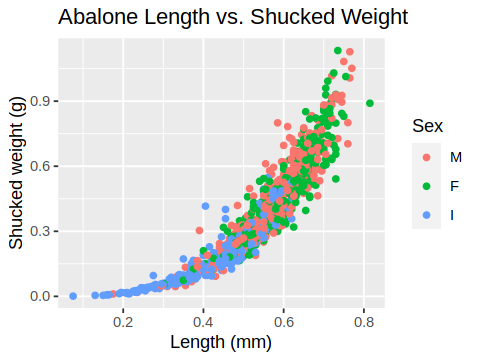

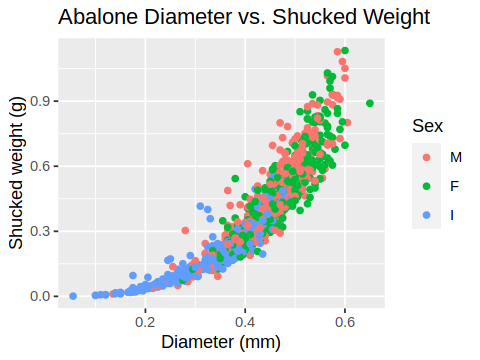

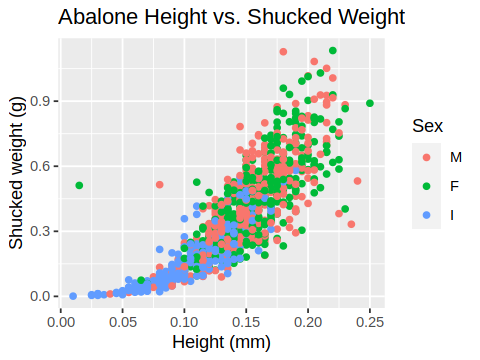

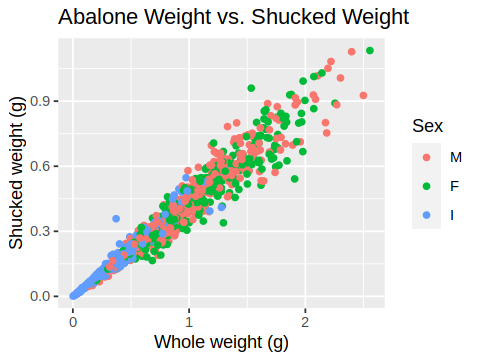

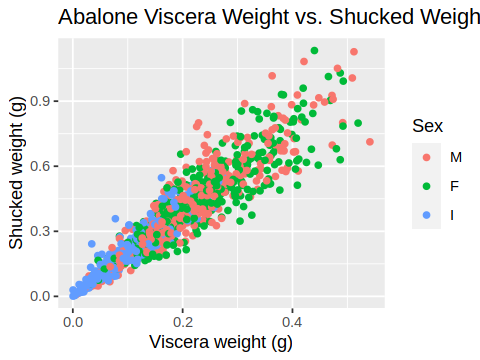

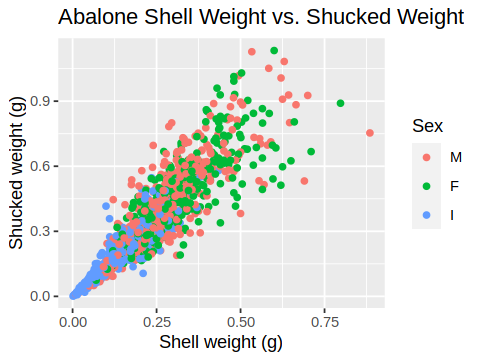

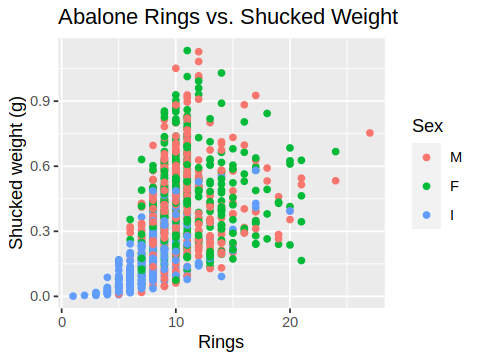

In [10]:
options(repr.plot.width = 4, repr.plot.height = 3)

abalone_length_plot <- abalone_testing |>
ggplot(aes(x = length, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Length (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Length vs. Shucked Weight")

abalone_diameter_plot <- abalone_testing |>
ggplot(aes(x = diameter, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Diameter (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Diameter vs. Shucked Weight")

abalone_height_plot <- abalone_testing |>
ggplot(aes(x = height, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Height (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Height vs. Shucked Weight")

abalone_weight_plot <- abalone_testing |>
ggplot(aes(x = whole_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Whole weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Weight vs. Shucked Weight")

abalone_viscera_weight_plot <- abalone_testing |>
ggplot(aes(x = viscera_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Viscera weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Viscera Weight vs. Shucked Weight")

abalone_shell_weight_plot <- abalone_testing |>
ggplot(aes(x = shell_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Shell weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Shell Weight vs. Shucked Weight")

abalone_rings_plot <- abalone_testing |>
ggplot(aes(x = rings, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Rings", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Rings vs. Shucked Weight")

abalone_length_plot
abalone_diameter_plot
abalone_height_plot
abalone_weight_plot
abalone_viscera_weight_plot
abalone_shell_weight_plot
abalone_rings_plot